In [1]:
import torch
from torch.utils.data import Dataset
import scanpy as sc
import scvelo as scv
import pandas as pd
from torch_geometric.nn import GATConv
import torch.nn.functional as F
from torch import nn
import numpy as np
from matplotlib import pyplot as plt

import oldmodel

#### DLPFC

In [2]:
scrna_path = "DLPFC_151673\\scrna.h5ad"
st_path = "DLPFC_151673\\filtered_feature_bc_matrix.h5"
st_full_path = "DLPFC_151673"

In [10]:
scrna = scv.read(scrna_path)
st = sc.read_visium(st_full_path)
scrna

AnnData object with n_obs × n_vars = 78886 × 30062
    obs: 'cell_type'

In [11]:
scrna.to_df()

,RP11-34P13.3,RP11-34P13.7,RP11-34P13.14,FO538757.3,FO538757.2,AP006222.2,RP5-857K21.15,RP4-669L17.2,RP4-669L17.10,RP5-857K21.4,...,AC011043.2,AL592183.1,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,FAM231B
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OPCs_1.17_Suicide_B1_TTTGTCAAGCTCCTTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ex_10_L2_4.17_Suicide_B1_TTTGTCAAGGCTAGCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ex_10_L2_4.17_Suicide_B1_TTTGTCAAGGGATGGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inhib_2_VIP.17_Suicide_B1_TTTGTCACATGTCCTC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
adata_example = scv.datasets.pancreas()
adata_example

100%|██████████| 50.0M/50.0M [00:01<00:00, 37.4MB/s]


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [7]:
st.to_df()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
st.obs

,in_tissue,array_row,array_col
AAACAAGTATCTCCCA-1,1,50,102
AAACAATCTACTAGCA-1,1,3,43
AAACACCAATAACTGC-1,1,59,19
AAACAGAGCGACTCCT-1,1,14,94
AAACAGCTTTCAGAAG-1,1,43,9
...,...,...,...
TTGTTTCACATCCAGG-1,1,58,42
TTGTTTCATTAGTCTA-1,1,60,30
TTGTTTCCATACAACT-1,1,45,27
TTGTTTGTATTACACG-1,1,73,41


In [13]:
data = oldmodel.SingleCellDataset(scrna_path)

,array_row,array_col
AAACAAGTATCTCCCA-1,50,102
AAACAATCTACTAGCA-1,3,43
AAACACCAATAACTGC-1,59,19
AAACAGAGCGACTCCT-1,14,94
AAACAGCTTTCAGAAG-1,43,9
...,...,...
TTGTTTCACATCCAGG-1,58,42
TTGTTTCATTAGTCTA-1,60,30
TTGTTTCCATACAACT-1,45,27
TTGTTTGTATTACACG-1,73,41


AxisError: axis 1 is out of bounds for array of dimension 1

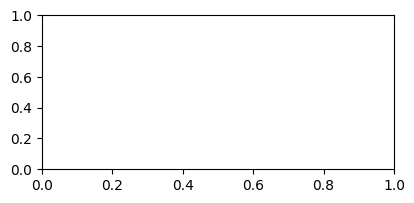

In [6]:
scv.pl.proportions(scrna)

#### Chicken heart

In [2]:
scrna_path = "chicken_heart\\RNA_D14_adata.h5ad"
st_path = "chicken_heart\\Visium_D14_adata.h5ad"

In [3]:
scrna = scv.read(scrna_path)
st = scv.read(st_path)

In [16]:
st.to_df("spliced")

,C10orf88,ARID4A,CTRB2,TUBB3,SPR,ENSGALG00000000071,TIMM17A,INTS4,ADIPOR1,UBE2T,...,ENSGALG00000051933,ENSGALG00000050868,ENSGALG00000049962,TCEA3,ENSGALG00000053489,ENSGALG00000050908,ENSGALG00000047547,ENSGALG00000054746,CCDC113,ENSGALG00000049917
AAACAAGTATCTCCCA,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.122402,0.0,0.000000,0.707467,...,0.0,0.000000,0.0,1.414935,0.0,0.0,0.0,0.000000,0.0,0.0
AAACATTTCCCGGATT,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.296033,0.0,0.659207,0.000000,...,0.0,1.977620,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCCGAACGAAATC,1.420402,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCGTTCGTCCAGG,0.000000,0.880268,0.0,0.880268,0.000000,0.0,3.521073,0.0,0.880268,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
AAACCTAAGCAGCCGG,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.961901,0.0,0.000000,0.000000,...,0.0,0.961901,0.0,0.000000,0.0,0.0,0.0,0.961901,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGTTTCCCGAAAG,0.000000,0.638771,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.638771,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
TTGTTAGCAAATTCGA,0.000000,1.121142,0.0,0.000000,0.000000,0.0,2.242284,0.0,1.121142,1.121142,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
TTGTTCAGTGTGCTAC,0.793473,0.000000,0.0,0.000000,0.000000,0.0,1.586945,0.0,0.793473,1.586945,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
TTGTTGTGTGTCAAGA,2.422246,0.000000,0.0,0.000000,1.211123,0.0,1.211123,0.0,0.000000,1.211123,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [17]:
st.to_df("unspliced")

,C10orf88,ARID4A,CTRB2,TUBB3,SPR,ENSGALG00000000071,TIMM17A,INTS4,ADIPOR1,UBE2T,...,ENSGALG00000051933,ENSGALG00000050868,ENSGALG00000049962,TCEA3,ENSGALG00000053489,ENSGALG00000050908,ENSGALG00000047547,ENSGALG00000054746,CCDC113,ENSGALG00000049917
AAACAAGTATCTCCCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTTCCCGGATT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCGAACGAAATC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTTCGTCCAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTAAGCAGCCGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGTTTCCCGAAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTAGCAAATTCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.254697,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTCAGTGTGCTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTGTGTGTCAAGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
xy = st.obsm['X_xy_loc']
print(np.max(xy, axis=0), np.min(xy, axis=0))

xdata, ydata = xy[:, 0], xy[:, 1]
xdata = list(set(xdata))
ydata = list(set(ydata))
xdata.sort()
ydata.sort()

print(xdata)

[18728.5 17710.5] [7498.5 3236.5]
[7498.5, 7499.5, 7500.5, 7633.5, 7634.5, 7635.5, 7636.5, 7637.5, 7638.5, 7639.5, 7640.5, 7641.5, 7646.5, 7772.5, 7773.5, 7774.5, 7775.5, 7776.5, 7777.5, 7778.5, 7779.5, 7780.5, 7781.5, 7782.5, 7783.5, 7784.5, 7785.5, 7910.5, 7911.5, 7912.5, 7913.5, 7914.5, 7915.5, 7916.5, 7917.5, 7918.5, 7919.5, 7920.5, 7921.5, 7922.5, 7923.5, 7924.5, 8048.5, 8049.5, 8050.5, 8051.5, 8052.5, 8053.5, 8054.5, 8055.5, 8056.5, 8057.5, 8058.5, 8059.5, 8060.5, 8061.5, 8062.5, 8063.5, 8064.5, 8186.5, 8187.5, 8188.5, 8189.5, 8190.5, 8191.5, 8192.5, 8193.5, 8194.5, 8195.5, 8196.5, 8197.5, 8198.5, 8199.5, 8200.5, 8201.5, 8202.5, 8203.5, 8204.5, 8323.5, 8324.5, 8325.5, 8326.5, 8327.5, 8328.5, 8329.5, 8330.5, 8331.5, 8332.5, 8333.5, 8334.5, 8335.5, 8336.5, 8337.5, 8338.5, 8339.5, 8340.5, 8341.5, 8342.5, 8343.5, 8461.5, 8462.5, 8463.5, 8464.5, 8465.5, 8466.5, 8467.5, 8468.5, 8469.5, 8470.5, 8471.5, 8472.5, 8473.5, 8474.5, 8475.5, 8476.5, 8477.5, 8478.5, 8479.5, 8480.5, 8481.5, 8482.

In [13]:
u = st.to_df('unspliced')
s = st.to_df('spliced')

z = np.column_stack((u, s))

(1967, 4000)

In [22]:
del model

In [23]:
import model

A, _, _ = model.discretize(xy, [[zz[0]] for zz in z])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

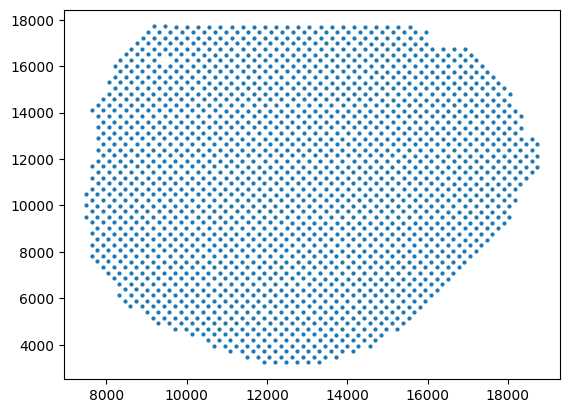

In [24]:
plt.scatter(xy[:, 0], xy[:, 1], s=4)
plt.show()

In [20]:
st

AnnData object with n_obs × n_vars = 1967 × 12295
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'Spatial_snn_res.1', 'seurat_clusters', 'scanorama_snn_res.1', 'Cardiomyocytes-1', 'Cardiomyocytes-2', 'Immature.myocardial.cells', 'Valve.cells', 'Macrophages', 'Fibroblast.cells', 'Erythrocytes', 'Endocardial.cells', 'MT-enriched.cardiomyocytes', 'Epi-epithelial.cells', 'Vascular.endothelial.cells', 'TMSB4X.high.cells', 'Epi-mesenchymal.cells', 'Dendritic.cells', 'Mural.cells', 'max', 'celltype_prediction_max', 'celltype_prediction', 'celltype_prediction_mode', 'region', 'n_counts'
    var: 'gene_ids', 'n_cells', 'gene_count_corr'
    uns: 'celltype_prediction_colors'
    obsm: 'X_xy_loc'
    layers: 'spliced', 'unspliced'

In [7]:
scv.pp.filter_and_normalize(st, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(st, n_pcs=30, n_neighbors=30)

Filtered out 10078 genes that are detected 20 counts (shared).
Extracted 2000 highly variable genes.
Logarithmized X.


c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


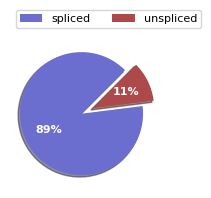

In [40]:
scv.pl.proportions(st)

In [21]:
scv.tl.velocity(st)

computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


In [51]:
st

AnnData object with n_obs × n_vars = 1967 × 2000
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'Spatial_snn_res.1', 'seurat_clusters', 'scanorama_snn_res.1', 'Cardiomyocytes-1', 'Cardiomyocytes-2', 'Immature.myocardial.cells', 'Valve.cells', 'Macrophages', 'Fibroblast.cells', 'Erythrocytes', 'Endocardial.cells', 'MT-enriched.cardiomyocytes', 'Epi-epithelial.cells', 'Vascular.endothelial.cells', 'TMSB4X.high.cells', 'Epi-mesenchymal.cells', 'Dendritic.cells', 'Mural.cells', 'max', 'celltype_prediction_max', 'celltype_prediction', 'celltype_prediction_mode', 'region', 'n_counts', 'velocity_self_transition', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'n_cells', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_prediction_colors', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocit

In [52]:
st.to_df('spliced')

,TIMM17A,UBE2T,TCF25,SNRPE,PRNP,DPYSL2,RDM1,TNNT2,TNNI1,NAV1,...,ANKRD11,ENSGALG00000047910,ENSGALG00000053766,COA4,ENSGALG00000050178,PRR11,ENSGALG00000046819,ENSGALG00000046938,MRPL33,NTPCR
AAACAAGTATCTCCCA,2.122402,0.707467,0.000000,2.122402,0.000000,1.414935,0.000000,21.931486,23.346420,0.000000,...,2.829869,0.000000,0.000000,0.0,0.707467,0.0,0.000000,0.000000,3.537336,1.414935
AAACATTTCCCGGATT,3.296033,0.000000,0.000000,2.636827,1.318413,1.318413,0.000000,28.345886,31.641920,0.659207,...,1.977620,0.000000,0.000000,0.0,0.659207,0.0,0.000000,0.000000,1.318413,0.659207
AAACCCGAACGAAATC,0.000000,0.000000,0.000000,5.681607,0.000000,0.000000,1.420402,17.044822,14.204019,1.420402,...,0.000000,0.000000,1.420402,0.0,4.261206,0.0,0.000000,0.000000,0.000000,0.000000
AAACCGTTCGTCCAGG,3.521073,0.000000,0.880268,0.000000,1.760536,0.000000,0.000000,24.647510,39.612069,0.000000,...,1.760536,0.880268,0.000000,0.0,0.880268,0.0,0.000000,0.000000,0.880268,0.880268
AAACCTAAGCAGCCGG,0.961901,0.000000,0.000000,0.961901,0.000000,0.961901,0.000000,22.123718,21.161817,0.000000,...,1.923802,0.000000,0.961901,0.0,0.000000,0.0,0.000000,0.000000,4.809504,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGTTTCCCGAAAG,0.000000,0.000000,0.638771,3.193856,1.277542,3.193856,0.000000,3.832627,3.193856,0.000000,...,0.638771,0.000000,1.277542,0.0,0.000000,0.0,0.000000,0.000000,3.193856,0.000000
TTGTTAGCAAATTCGA,2.242284,1.121142,0.000000,2.242284,0.000000,2.242284,0.000000,17.938270,15.695986,0.000000,...,1.121142,0.000000,1.121142,0.0,0.000000,0.0,0.000000,0.000000,5.605709,0.000000
TTGTTCAGTGTGCTAC,1.586945,1.586945,0.793473,3.173891,0.793473,0.000000,0.000000,36.499741,27.771542,0.000000,...,3.173891,0.000000,0.793473,0.0,0.000000,0.0,0.793473,0.793473,4.760836,0.793473
TTGTTGTGTGTCAAGA,1.211123,1.211123,0.000000,3.633368,1.211123,0.000000,0.000000,29.066948,38.755930,0.000000,...,1.211123,0.000000,1.211123,0.0,0.000000,0.0,0.000000,0.000000,1.211123,1.211123


In [42]:
scv.tl.velocity_graph(st)
scv.tl.umap(st)

computing velocity graph (using 1/20 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [62]:
scv.tl.louvain(st)
st

AnnData object with n_obs × n_vars = 1967 × 2000
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'Spatial_snn_res.1', 'seurat_clusters', 'scanorama_snn_res.1', 'Cardiomyocytes-1', 'Cardiomyocytes-2', 'Immature.myocardial.cells', 'Valve.cells', 'Macrophages', 'Fibroblast.cells', 'Erythrocytes', 'Endocardial.cells', 'MT-enriched.cardiomyocytes', 'Epi-epithelial.cells', 'Vascular.endothelial.cells', 'TMSB4X.high.cells', 'Epi-mesenchymal.cells', 'Dendritic.cells', 'Mural.cells', 'max', 'celltype_prediction_max', 'celltype_prediction', 'celltype_prediction_mode', 'region', 'n_counts', 'velocity_self_transition', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain'
    var: 'gene_ids', 'n_cells', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'spearmans_score'
    uns: 'celltype_prediction_colors', 'pca', 'neighbors', 'velocity_param

c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Progra

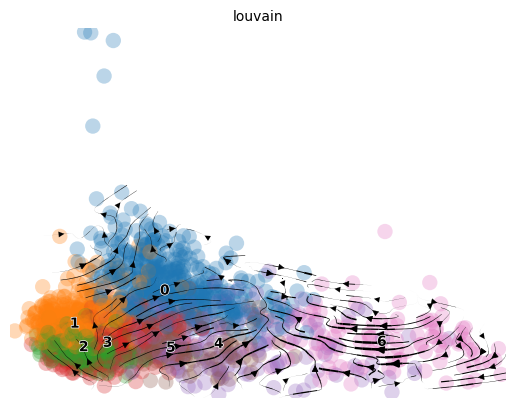

In [72]:
scv.pl.velocity_embedding_stream(st, basis='pca')

c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Progra

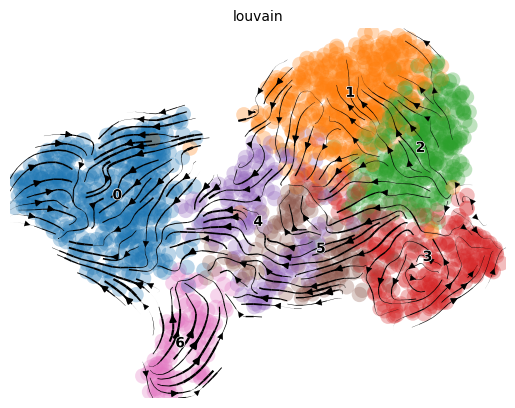

In [71]:
scv.pl.velocity_embedding_stream(st, basis='umap')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_xy_loc', embedded velocity vectors (adata.obsm)


c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Progra

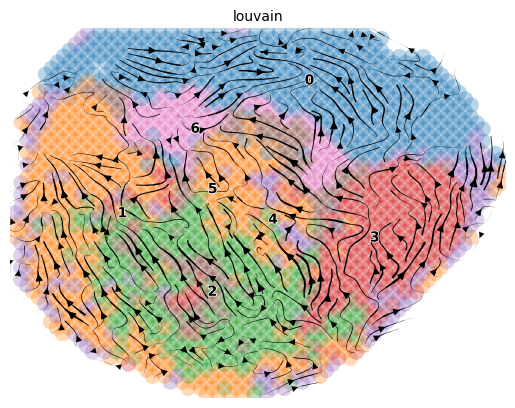

In [70]:
scv.pl.velocity_embedding_stream(st, basis='xy_loc')

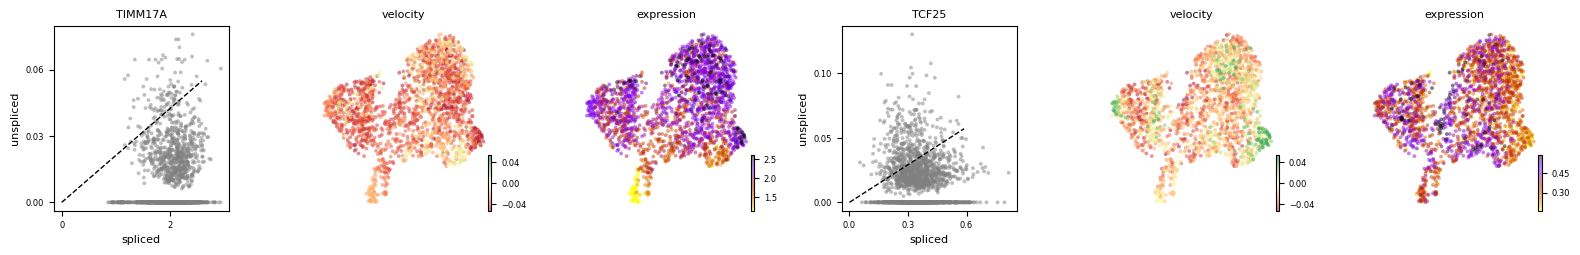

In [54]:
scv.pl.velocity(st, ['TIMM17A', 'TCF25'], ncols=2)

In [65]:
scv.tl.rank_velocity_genes(st, groupby='louvain', min_corr=.3)

df = pd.DataFrame(st.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,0,1,2,3,4,5,6
0,MDK,FHL2,TRIM55,ZNF106,DHRS3,COL12A1,COL12A1
1,ALCAM,NEXN,SMPX,SPON1,MDK,ENSGALG00000029474,ENSGALG00000051496
2,POSTN,RPLP0,SBSPON,ENSGALG00000047339,MND1,NEXN,PYCR1
3,SPON1,ENSGALG00000047410,RPLP0,ENSGALG00000051496,RSPO3,SPON1,POFUT1
4,SLIT3,ENSGALG00000020788,NEXN,SLC43A3,COL5A1,MYH1D,PDZD3


c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\Tian\AppData\Local\Progra

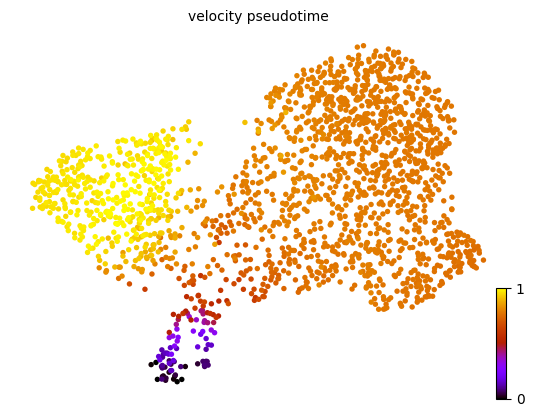

In [75]:
scv.tl.velocity_pseudotime(st)
scv.pl.scatter(st, color='velocity_pseudotime', cmap='gnuplot')

In [69]:
st

AnnData object with n_obs × n_vars = 1967 × 2000
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'Spatial_snn_res.1', 'seurat_clusters', 'scanorama_snn_res.1', 'Cardiomyocytes-1', 'Cardiomyocytes-2', 'Immature.myocardial.cells', 'Valve.cells', 'Macrophages', 'Fibroblast.cells', 'Erythrocytes', 'Endocardial.cells', 'MT-enriched.cardiomyocytes', 'Epi-epithelial.cells', 'Vascular.endothelial.cells', 'TMSB4X.high.cells', 'Epi-mesenchymal.cells', 'Dendritic.cells', 'Mural.cells', 'max', 'celltype_prediction_max', 'celltype_prediction', 'celltype_prediction_mode', 'region', 'n_counts', 'velocity_self_transition', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'gene_ids', 'n_cells', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'spearmans_score', 'velocity_score'
    u